In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pandas import Series, DataFrame

In [2]:
# 1. Find out how many countries are there in the dataset.
# 2. Examine the data by using visualizations.
# 3. Find out how many countries with respect to the region are available
# in the dataset
# 4. On average which region has the highest
# a. GDP per capita (current US$)
# b. International trade: Imports (million US$)
# 5. Find out which region has more consistent with respect to GDP per
# capita (current US$)

In [3]:
data = pd.read_csv('Dataset_w6.csv')

In [4]:
data.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491


In [5]:
data.isna().sum()

country                                       0
Region                                        0
Surface area (km2)                            0
Population in thousands (2017)                0
GDP per capita (current US$)                  0
Agricultural production index                 0
International trade: Imports (million US$)    0
dtype: int64

In [6]:
data.dtypes

country                                        object
Region                                         object
Surface area (km2)                              int64
Population in thousands (2017)                  int64
GDP per capita (current US$)                  float64
Agricultural production index                   int64
International trade: Imports (million US$)      int64
dtype: object

# 1. Number of countries

In [7]:
data['country'].count()

196

# 2. Visualizations

<AxesSubplot:xlabel='Population in thousands (2017)', ylabel='GDP per capita (current US$)'>

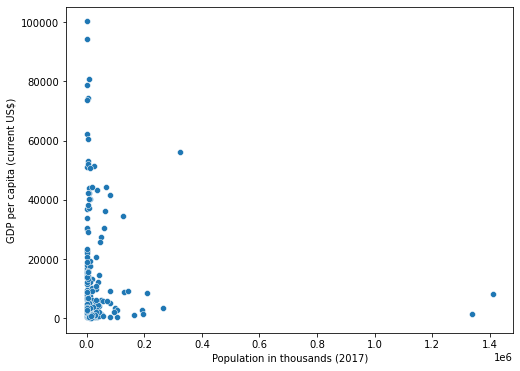

In [8]:
plt.figure(figsize=(8,6))

sns.scatterplot(y='GDP per capita (current US$)', x = 'Population in thousands (2017)', data=data)

Text(0, 0.5, 'Population')

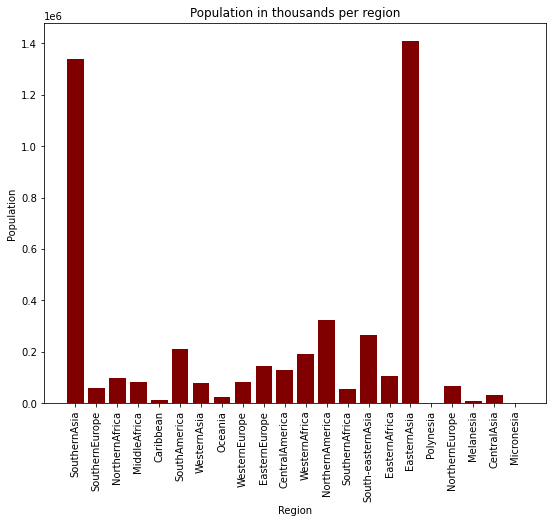

In [9]:
plt.figure(figsize=(9,7))

plt.bar(data['Region'], data['Population in thousands (2017)'], color = 'maroon')
plt.xticks(rotation = 90)
plt.title('Population in thousands per region')
plt.xlabel('Region')
plt.ylabel('Population')

Text(0.5, 1.0, 'Count of countries per region')

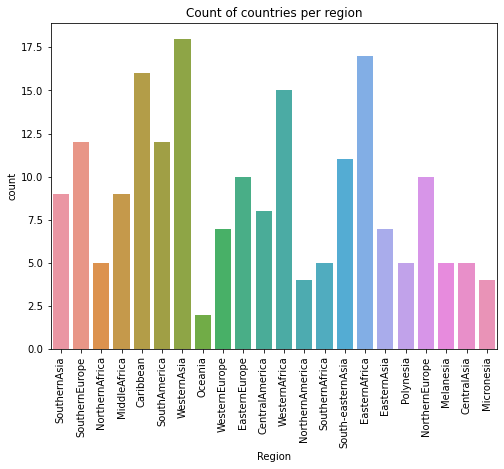

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data['Region'])
plt.xticks(rotation=90)
plt.title('Count of countries per region')

# 3. Countries with respect to regions

In [11]:
data[['Region','country']].groupby('Region').count()

,country
Region,
Caribbean,16
CentralAmerica,8
CentralAsia,5
EasternAfrica,17
EasternAsia,7
EasternEurope,10
Melanesia,5
Micronesia,4
MiddleAfrica,9


# 4. a. Region with largest GDP per capita on average

In [12]:
topgdp = data[['Region','GDP per capita (current US$)']].groupby('Region').mean()
topgdp.nlargest(1, 'GDP per capita (current US$)')

,GDP per capita (current US$)
Region,
NorthernAmerica,57659.0


# 4. b. Region with largest International trade on average

In [13]:
topimport = data[['Region','International trade: Imports (million US$)']].groupby('Region').mean()
topimport.nlargest(1, 'International trade: Imports (million US$)')

,International trade: Imports (million US$)
Region,
NorthernAmerica,663552.25


# 5. Region with consistent GDP per capita

In [14]:
constgdp = data[['Region', 'GDP per capita (current US$)']].groupby('Region').var()
constgdp.nsmallest(1, 'GDP per capita (current US$)')

,GDP per capita (current US$)
Region,
WesternAfrica,664380.509714
